# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**NAME, SURNAME**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [1]:
# Libraries for data loading, data manipulation and data visulisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
%matplotlib inline

# applying style
plt.style.use("ggplot")
rcParams['figure.figsize'] = (12, 6)

# Libraries for data preparation and model building
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
import math
from scipy.stats import pearsonr
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')
# Setting global constants to ensure notebook results are reproducible
PARAMETER_CONSTANT = 42

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [3]:
train_df = pd.read_csv('df_train.csv') # load the data
test_df = pd.read_csv('df_test.csv') 

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


In [4]:
# getting familier with the dataset
train_df.head()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


It is noticed in the table above that there  is additional column called "Unnamed" that needs to be removed as it contains duplicate indexes of the rows.

In [5]:
# The shape of the data set
train_df.shape

(8763, 49)

The data has 8763 number of rows and 49 columns

In [6]:
# Column names
train_df.columns

Index(['Unnamed: 0', 'time', 'Madrid_wind_speed', 'Valencia_wind_deg',
       'Bilbao_rain_1h', 'Valencia_wind_speed', 'Seville_humidity',
       'Madrid_humidity', 'Bilbao_clouds_all', 'Bilbao_wind_speed',
       'Seville_clouds_all', 'Bilbao_wind_deg', 'Barcelona_wind_speed',
       'Barcelona_wind_deg', 'Madrid_clouds_all', 'Seville_wind_speed',
       'Barcelona_rain_1h', 'Seville_pressure', 'Seville_rain_1h',
       'Bilbao_snow_3h', 'Barcelona_pressure', 'Seville_rain_3h',
       'Madrid_rain_1h', 'Barcelona_rain_3h', 'Valencia_snow_3h',
       'Madrid_weather_id', 'Barcelona_weather_id', 'Bilbao_pressure',
       'Seville_weather_id', 'Valencia_pressure', 'Seville_temp_max',
       'Madrid_pressure', 'Valencia_temp_max', 'Valencia_temp',
       'Bilbao_weather_id', 'Seville_temp', 'Valencia_humidity',
       'Valencia_temp_min', 'Barcelona_temp_max', 'Madrid_temp_max',
       'Barcelona_temp', 'Bilbao_temp_min', 'Bilbao_temp',
       'Barcelona_temp_min', 'Bilbao_temp_max', 'Sev

In [7]:
# look at data statistics
train_df.describe()

,Unnamed: 0,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,...,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,4381.000000,2.425729,0.135753,2.586272,62.658793,57.414717,43.469132,1.850356,13.714748,158.957511,...,289.540309,289.855459,285.017973,286.422929,288.447422,287.966027,291.633356,288.419439,287.202203,10673.857612
std,2529.804538,1.850371,0.374901,2.411190,22.621226,24.335396,32.551044,1.695888,24.272482,102.056299,...,9.752047,6.528111,6.705672,6.818682,6.102593,7.105590,8.178220,9.346796,9.206237,5218.046404
min,0.000000,0.000000,0.000000,0.000000,8.333333,6.333333,0.000000,0.000000,0.000000,0.000000,...,264.983333,270.816667,264.483333,267.483333,269.483333,269.063000,270.150000,264.983333,264.983333,-6618.000000
25%,2190.500000,1.000000,0.000000,1.000000,44.333333,36.333333,10.000000,0.666667,0.000000,73.333333,...,282.150000,284.973443,280.085167,281.374167,284.150000,282.836776,285.816667,281.404281,280.299167,7390.333333
50%,4381.000000,2.000000,0.000000,1.666667,65.666667,58.000000,45.000000,1.000000,0.000000,147.000000,...,288.116177,289.416667,284.816667,286.158333,288.150000,287.630000,290.816667,287.053333,286.083333,11114.666667
75%,6571.500000,3.333333,0.100000,3.666667,82.000000,78.666667,75.000000,2.666667,20.000000,234.000000,...,296.816667,294.909000,289.816667,291.034167,292.966667,292.483333,297.150000,295.154667,293.884500,14498.166667
max,8762.000000,13.000000,3.000000,52.000000,100.000000,100.000000,100.000000,12.666667,97.333333,359.333333,...,314.483333,307.316667,309.816667,310.710000,304.816667,317.966667,314.816667,313.133333,310.383333,31904.000000


In [8]:
# Check the dtypes of the dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            8763 non-null   int64  
 1   time                  8763 non-null   object 
 2   Madrid_wind_speed     8763 non-null   float64
 3   Valencia_wind_deg     8763 non-null   object 
 4   Bilbao_rain_1h        8763 non-null   float64
 5   Valencia_wind_speed   8763 non-null   float64
 6   Seville_humidity      8763 non-null   float64
 7   Madrid_humidity       8763 non-null   float64
 8   Bilbao_clouds_all     8763 non-null   float64
 9   Bilbao_wind_speed     8763 non-null   float64
 10  Seville_clouds_all    8763 non-null   float64
 11  Bilbao_wind_deg       8763 non-null   float64
 12  Barcelona_wind_speed  8763 non-null   float64
 13  Barcelona_wind_deg    8763 non-null   float64
 14  Madrid_clouds_all     8763 non-null   float64
 15  Seville_wind_speed   

From the information above most of the columns are store as float64 except for columns such as ``time``, ``Valencia_wind_deg`` and ``Seville_pressure`` which are stored as object. It is also noticed that ``Valencia_pressure`` has missing values

In [9]:
#Check for the outliers 
train_df.kurt()

Unnamed: 0                -1.200000
Madrid_wind_speed          2.036462
Bilbao_rain_1h            32.904656
Valencia_wind_speed       35.645426
Seville_humidity          -1.017983
Madrid_humidity           -1.167537
Bilbao_clouds_all         -1.533417
Bilbao_wind_speed          3.631565
Seville_clouds_all         2.155921
Bilbao_wind_deg           -1.083530
Barcelona_wind_speed       1.493635
Barcelona_wind_deg        -0.959160
Madrid_clouds_all          0.142079
Seville_wind_speed         1.398580
Barcelona_rain_1h        101.578931
Seville_rain_1h           93.840746
Bilbao_snow_3h           806.128471
Barcelona_pressure      3687.564230
Seville_rain_3h          413.136592
Madrid_rain_1h            76.584491
Barcelona_rain_3h        187.800460
Valencia_snow_3h        4089.323165
Madrid_weather_id          9.259047
Barcelona_weather_id       5.701882
Bilbao_pressure            1.825323
Seville_weather_id        10.710308
Valencia_pressure          2.211823
Seville_temp_max          -0

There are a number of columns with the outliers such as `Barcelona_pressure`, `Valencia_snow_3h`, `Valencia_wind_speed` etc.

In [10]:
# Skewness of the data
train_df.skew()

Unnamed: 0               0.000000
Madrid_wind_speed        1.441144
Bilbao_rain_1h           5.222802
Valencia_wind_speed      3.499637
Seville_humidity        -0.310175
Madrid_humidity         -0.057378
Bilbao_clouds_all       -0.053085
Bilbao_wind_speed        1.716914
Seville_clouds_all       1.814452
Bilbao_wind_deg          0.226927
Barcelona_wind_speed     1.057331
Barcelona_wind_deg      -0.180001
Madrid_clouds_all        1.246745
Seville_wind_speed       1.151006
Barcelona_rain_1h        8.726988
Seville_rain_1h          8.067341
Bilbao_snow_3h          26.177568
Barcelona_pressure      57.979664
Seville_rain_3h         19.342574
Madrid_rain_1h           7.074308
Barcelona_rain_3h       12.696605
Valencia_snow_3h        63.298084
Madrid_weather_id       -3.107722
Barcelona_weather_id    -2.584011
Bilbao_pressure         -0.999642
Seville_weather_id      -3.275574
Valencia_pressure       -1.705162
Seville_temp_max        -0.033931
Madrid_pressure         -1.850768
Valencia_temp_

Again some of the columns are positively skewed such as `Valencia_snow_3h`, `Barcelona_pressure`, `Bilbao_snow_3h` etc.

<AxesSubplot:xlabel='Valencia_wind_deg', ylabel='load_shortfall_3h'>

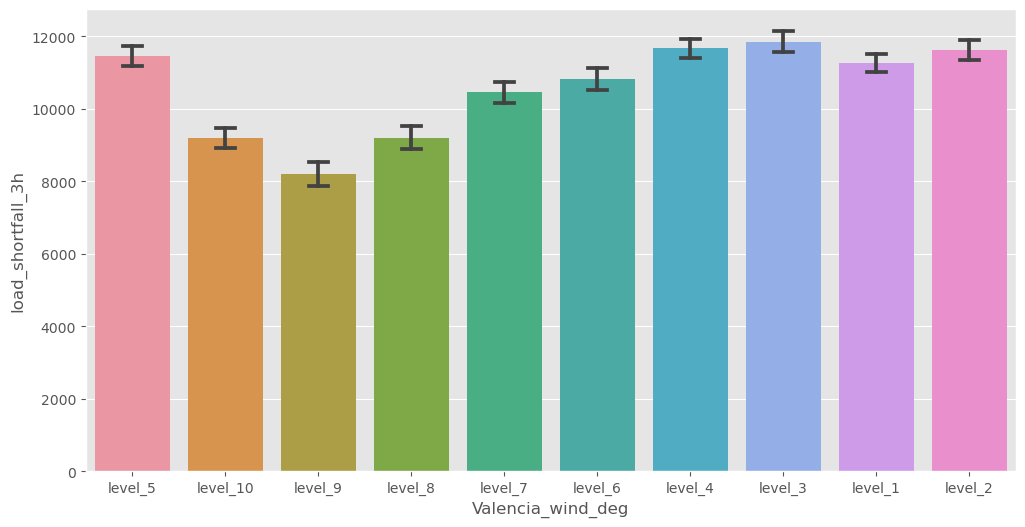

In [11]:
# plot relevant feature interactions

sns.barplot(x="Valencia_wind_deg", y="load_shortfall_3h", data=train_df, ci=90, capsize=0.2)

In [12]:
rel_features = ['Madrid_wind_speed', 'Bilbao_rain_1h', 'Madrid_temp', 'Barcelona_pressure', 'Seville_rain_3h', 
                     'Valencia_temp_max', 'Valencia_temp_min'] 
target = train_df['load_shortfall_3h']

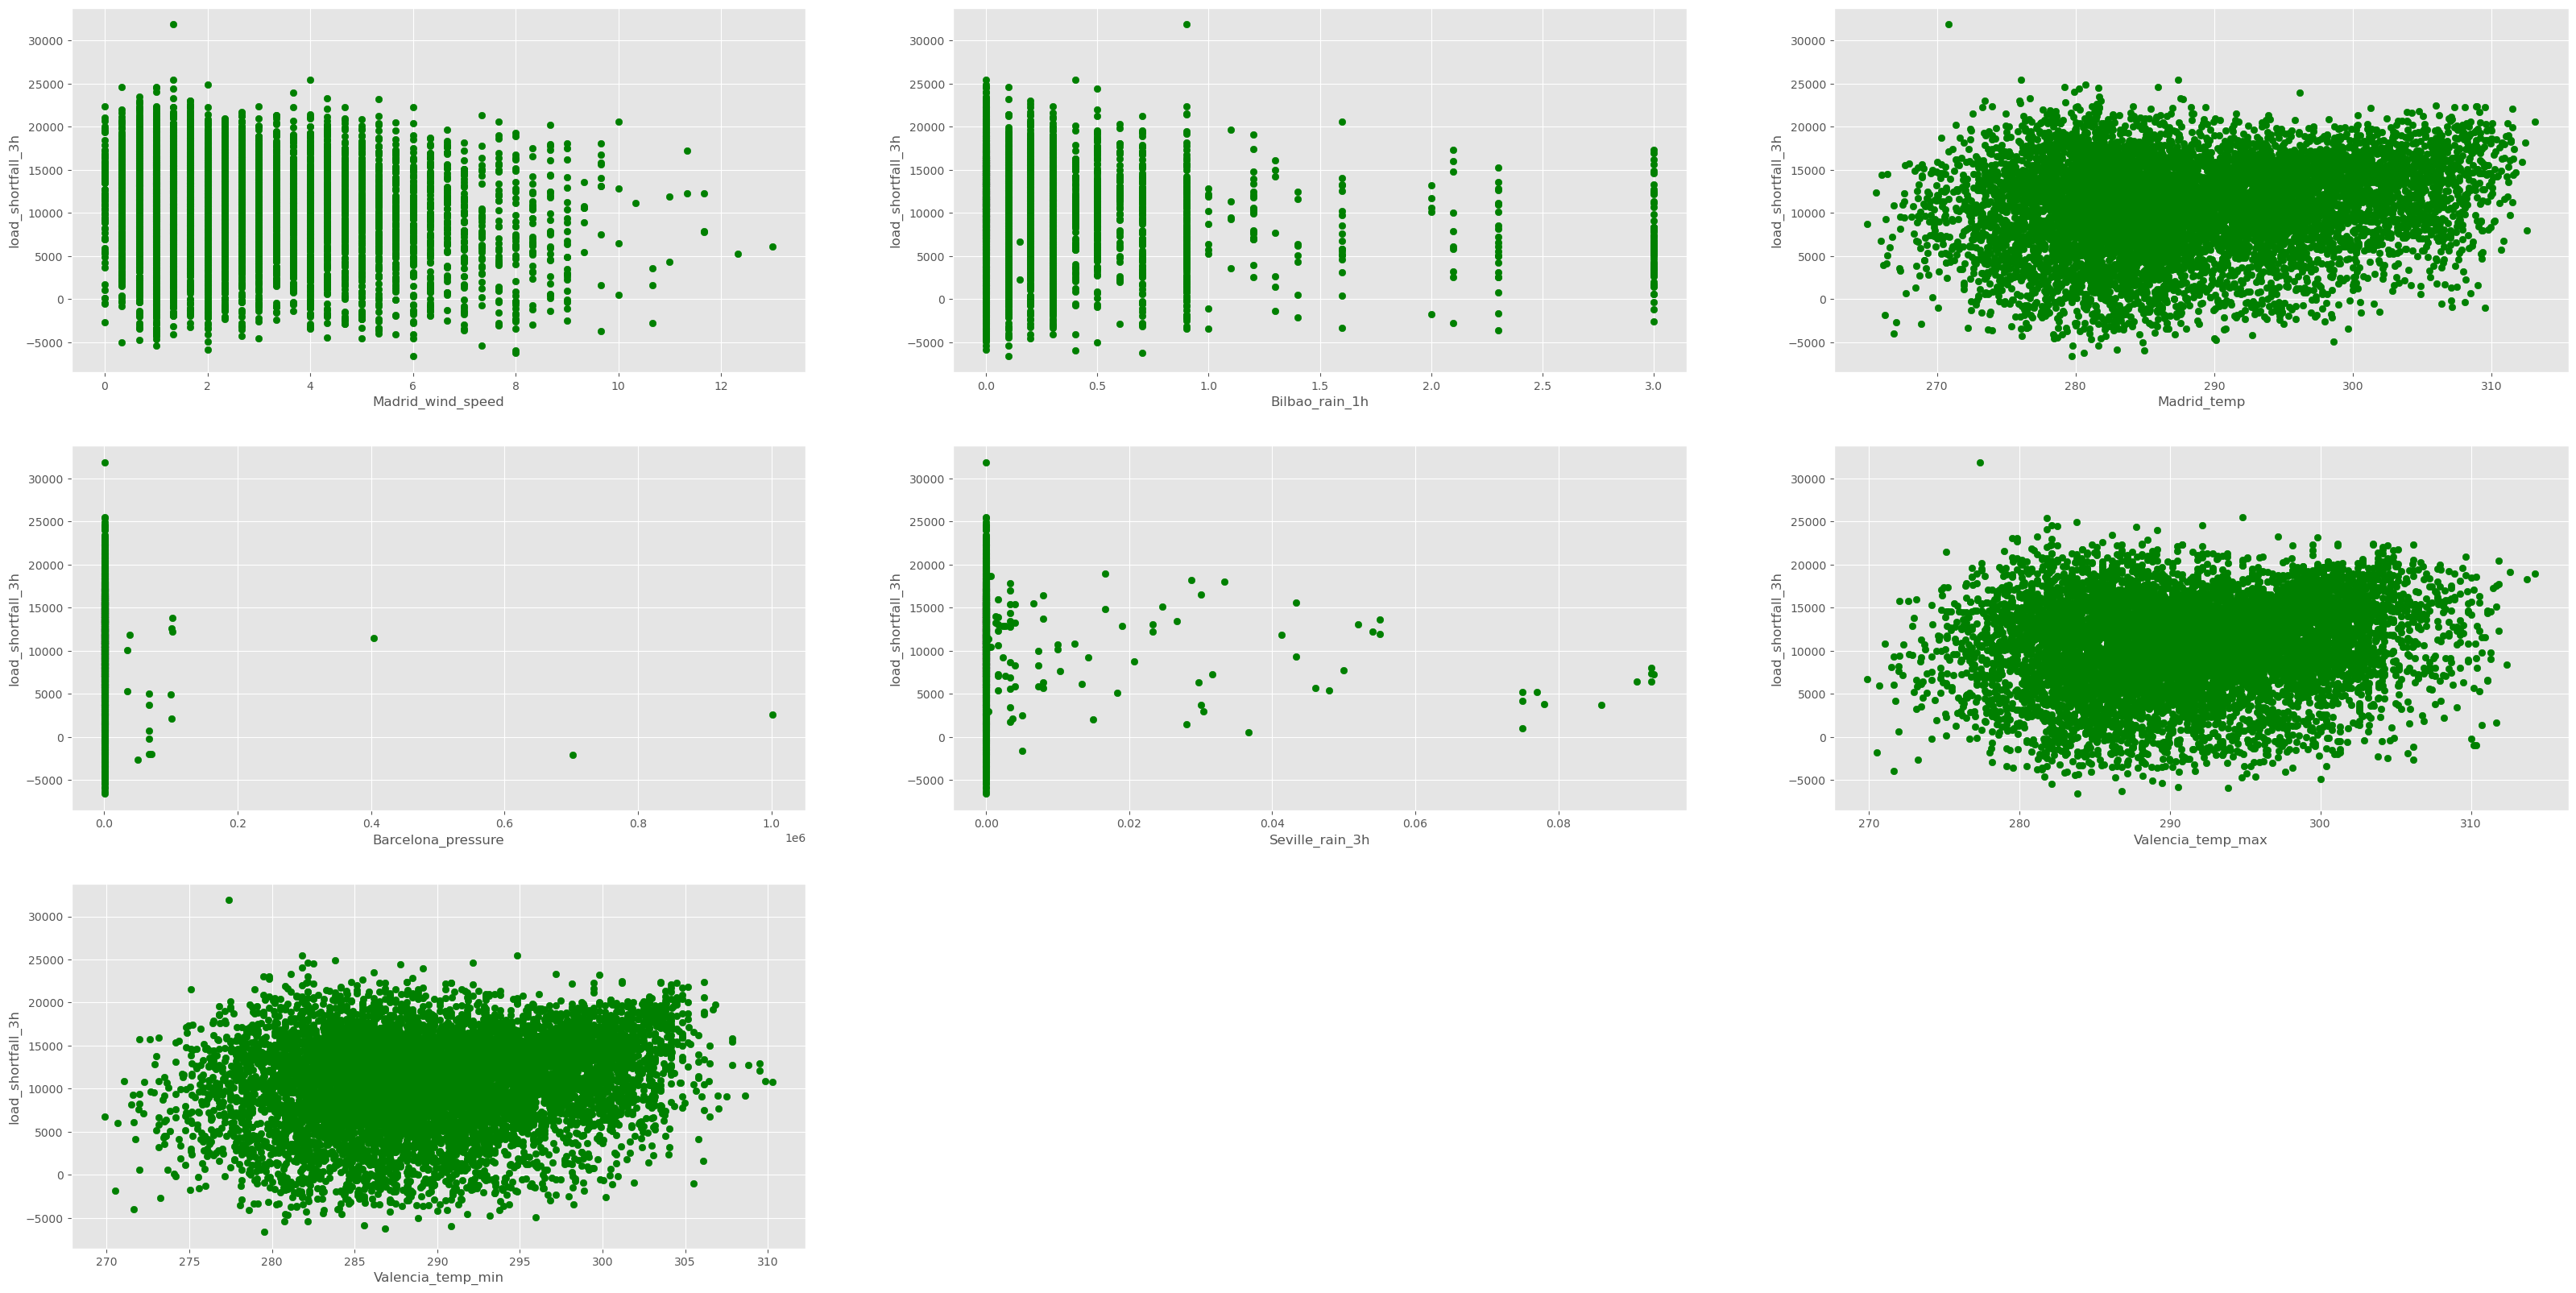

In [13]:
plt.figure(figsize=(40,20))

for i, col in enumerate(rel_features):
    plt.subplot(3, 3, i+1)
    x = train_df[col]
    y = target
    plt.xlabel(col)
    plt.ylabel('load_shortfall_3h')
    plt.scatter(x, y, color='green', marker='o')

The graphs above shows no obvious correlation between the target variable and the relevant feaures (independent variables)

In [14]:
# evaluate correlation
train_df.corr()

,Unnamed: 0,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
Unnamed: 0,1.000000,-0.109288,-0.249633,-0.090161,-0.079025,-0.103359,-0.068123,0.049197,-0.140583,-0.155738,...,0.093378,0.068078,0.028698,0.081799,0.103436,0.146216,0.037487,0.088439,0.085197,0.192612
Madrid_wind_speed,-0.109288,1.000000,0.259719,0.513092,-0.117892,-0.137092,0.244001,0.377854,0.191251,0.270950,...,0.091464,0.080133,0.077330,0.060467,0.089992,0.042114,0.110278,0.109572,0.098138,-0.150981
Bilbao_rain_1h,-0.249633,0.259719,1.000000,0.265864,0.069878,0.106765,0.370733,0.085398,0.081131,0.279350,...,-0.148397,-0.138901,-0.141269,-0.182494,-0.106593,-0.219871,-0.120575,-0.135927,-0.116431,-0.152510
Valencia_wind_speed,-0.090161,0.513092,0.265864,1.000000,-0.075227,-0.019388,0.210524,0.386478,0.163675,0.248643,...,-0.021970,-0.021456,-0.010166,-0.022676,0.001413,-0.033271,0.003618,-0.011982,-0.019742,-0.142791
Seville_humidity,-0.079025,-0.117892,0.069878,-0.075227,1.000000,0.799831,0.061680,-0.088180,0.399436,-0.087246,...,-0.708937,-0.617797,-0.605493,-0.604733,-0.595065,-0.583718,-0.784850,-0.717171,-0.688664,-0.167290
Madrid_humidity,-0.103359,-0.137092,0.106765,-0.019388,0.799831,1.000000,0.041878,-0.016808,0.374112,-0.069570,...,-0.803260,-0.684867,-0.635760,-0.634825,-0.636777,-0.611395,-0.769591,-0.802605,-0.759633,-0.150536
Bilbao_clouds_all,-0.068123,0.244001,0.370733,0.210524,0.061680,0.041878,1.000000,0.031915,0.046737,0.280154,...,-0.048491,-0.023171,-0.067731,-0.114118,-0.010804,-0.158014,-0.077417,-0.046686,-0.046189,-0.127293
Bilbao_wind_speed,0.049197,0.377854,0.085398,0.386478,-0.088180,-0.016808,0.031915,1.000000,0.127344,0.417534,...,0.025367,0.018967,0.107302,0.142435,0.023711,0.177123,0.055077,0.031245,0.021425,-0.081602
Seville_clouds_all,-0.140583,0.191251,0.081131,0.163675,0.399436,0.374112,0.046737,0.127344,1.000000,0.053482,...,-0.238895,-0.186463,-0.134249,-0.152393,-0.153412,-0.165567,-0.200453,-0.227094,-0.212758,-0.091804
Bilbao_wind_deg,-0.155738,0.270950,0.279350,0.248643,-0.087246,-0.069570,0.280154,0.417534,0.053482,1.000000,...,0.028535,0.068701,0.095047,0.065396,0.086482,0.031187,0.062663,0.044102,0.048397,-0.120800


<AxesSubplot:>

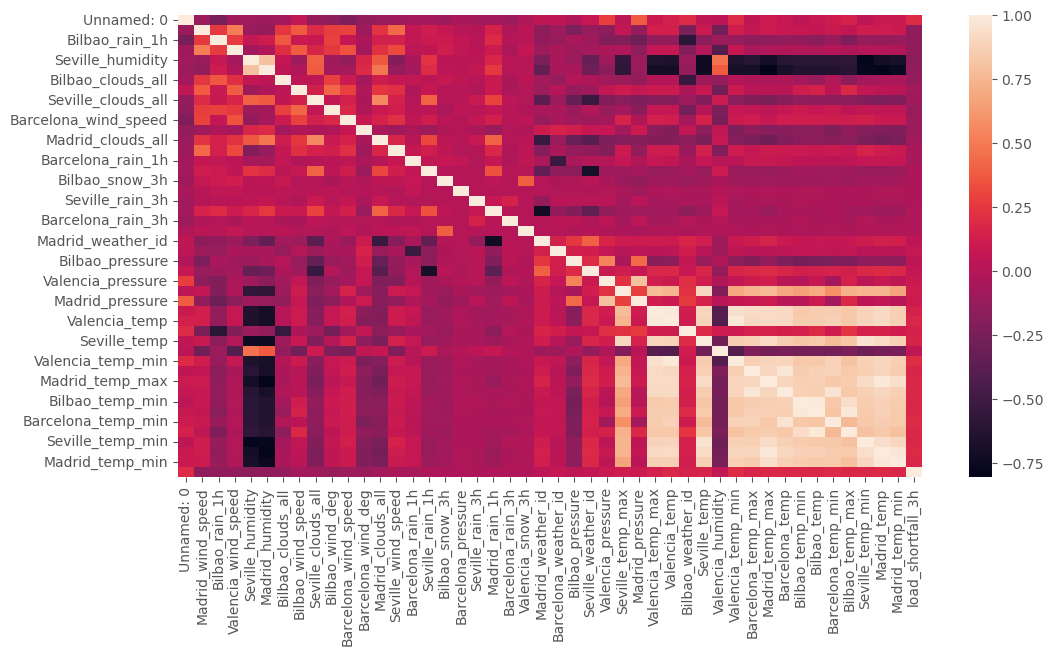

In [15]:
sns.heatmap(train_df.corr())

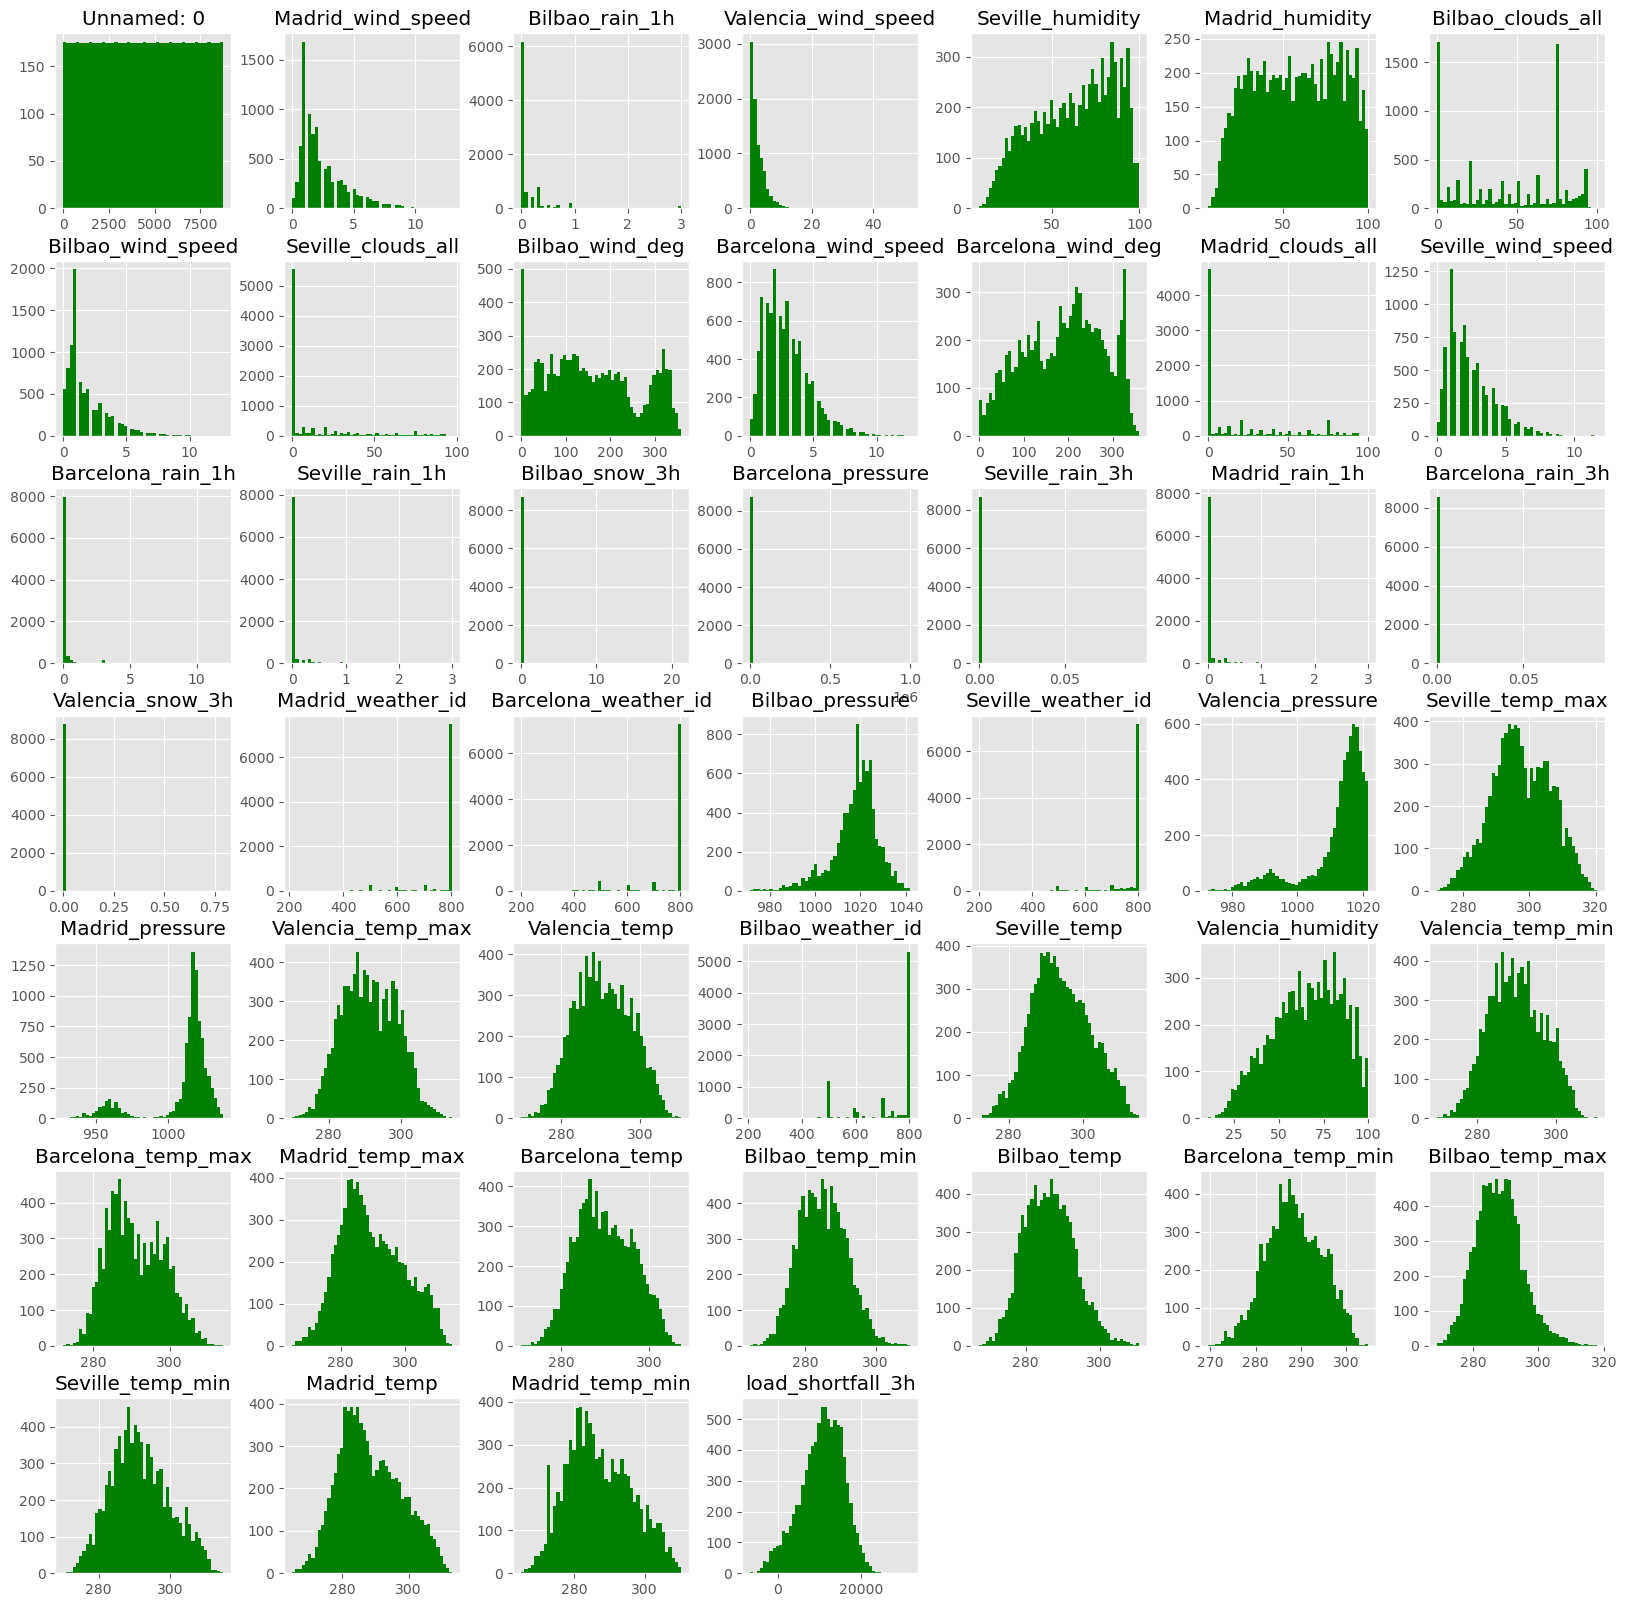

In [16]:
# have a look at feature distributions

train_df.hist(bins=50, figsize=(20,20), color='green')

<AxesSubplot:xlabel='Valencia_pressure'>

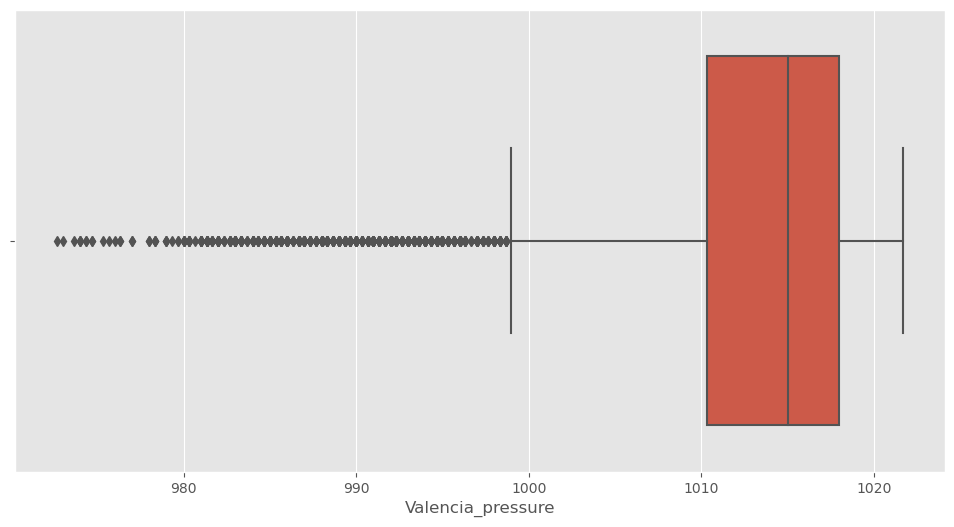

In [17]:
# look at the box plot for Valencia_pressure
sns.boxplot(train_df['Valencia_pressure'])

The box plot above shows that the feature has a lot of outliers so we cannot use the mean. Since pressure is somewhat based on high or low levels, it is better to use the mode rather than the median. So we will impute the missing values based on the mode.

In [18]:
# look at data statistics of this column

print('Mean: ', round(train_df['Valencia_pressure'].mean(), 1))
print('\n')
print('Median: ', train_df['Valencia_pressure'].median())
print('\n')
print('Mode: ', train_df['Valencia_pressure'].mode())
print('\n')

Mean:  1012.1


Median:  1015.0


Mode:  0    1018.0
Name: Valencia_pressure, dtype: float64




In [19]:
# cleaning both test and train data set
clean_df = train_df
clean_test_df = test_df

# impute missing values using mode
vp_training_mode=clean_df['Valencia_pressure'].mode()[0]

In [20]:
clean_df['Valencia_pressure'] = clean_df['Valencia_pressure'].fillna(vp_training_mode)
clean_test_df['Valencia_pressure'] = clean_test_df['Valencia_pressure'].fillna(vp_training_mode)

In [21]:
print(clean_df['Valencia_pressure'].isnull().sum())
print(clean_test_df['Valencia_pressure'].isnull().sum())

0
0


missing values have been replaced with the mode

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

In [22]:
# convert the time variable to a datetime datatype

clean_df['time'] = pd.to_datetime(clean_df['time'])

clean_test_df['time'] = pd.to_datetime(clean_test_df['time'])

In [23]:
# create new features

clean_df['Valencia_wind_deg'] = clean_df['Valencia_wind_deg'].str.extract('(\d+)')
clean_df['Valencia_wind_deg'] = pd.to_numeric(clean_df['Valencia_wind_deg'])

clean_df['Seville_pressure'] = clean_df['Seville_pressure'].str.extract('(\d+)')
clean_df['Seville_pressure'] = pd.to_numeric(clean_df['Seville_pressure'])

# doing the same for the test set
clean_test_df['Valencia_wind_deg'] = clean_test_df['Valencia_wind_deg'].str.extract('(\d+)')
clean_test_df['Valencia_wind_deg'] = pd.to_numeric(clean_test_df['Valencia_wind_deg'])

clean_test_df['Seville_pressure'] = clean_test_df['Seville_pressure'].str.extract('(\d+)')
clean_test_df['Seville_pressure'] = pd.to_numeric(clean_test_df['Seville_pressure'])

# extracting relevent features such as year, month, weekday and hour for both test and train dataset.

clean_df['Year'] = clean_df['time'].dt.year
clean_df['Month'] = clean_df['time'].dt.month
clean_df['Weekday'] = clean_df['time'].dt.dayofweek
clean_df['Hour'] = clean_df['time'].dt.hour

#test dataset
clean_test_df['Year'] = clean_test_df['time'].dt.year
clean_test_df['Month'] = clean_test_df['time'].dt.month
clean_test_df['Weekday'] = clean_test_df['time'].dt.dayofweek
clean_test_df['Hour'] = clean_test_df['time'].dt.hour

In [24]:
clean_df.head(2)

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h,Year,Month,Weekday,Hour
0,0,2015-01-01 03:00:00,0.666667,5,0.0,0.666667,74.333333,64.000000,0.0,1.0,...,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667,2015,1,3,3
1,1,2015-01-01 06:00:00,0.333333,10,0.0,1.666667,78.333333,64.666667,0.0,1.0,...,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667,2015,1,3,6


In [25]:
# remove missing values/ features

clean_df = clean_df.drop(['Unnamed: 0' , 'time'], axis = 1)
clean_test_df = clean_test_df.drop(['Unnamed: 0' , 'time'], axis = 1)

In [26]:
clean_df.head(2)

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h,Year,Month,Weekday,Hour
0,0.666667,5,0.0,0.666667,74.333333,64.000000,0.0,1.0,0.0,223.333333,...,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667,2015,1,3,3
1,0.333333,10,0.0,1.666667,78.333333,64.666667,0.0,1.0,0.0,221.000000,...,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667,2015,1,3,6


In [27]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 51 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Madrid_wind_speed     8763 non-null   float64
 1   Valencia_wind_deg     8763 non-null   int64  
 2   Bilbao_rain_1h        8763 non-null   float64
 3   Valencia_wind_speed   8763 non-null   float64
 4   Seville_humidity      8763 non-null   float64
 5   Madrid_humidity       8763 non-null   float64
 6   Bilbao_clouds_all     8763 non-null   float64
 7   Bilbao_wind_speed     8763 non-null   float64
 8   Seville_clouds_all    8763 non-null   float64
 9   Bilbao_wind_deg       8763 non-null   float64
 10  Barcelona_wind_speed  8763 non-null   float64
 11  Barcelona_wind_deg    8763 non-null   float64
 12  Madrid_clouds_all     8763 non-null   float64
 13  Seville_wind_speed    8763 non-null   float64
 14  Barcelona_rain_1h     8763 non-null   float64
 15  Seville_pressure     

In [28]:
# engineer existing features

# create standard scaler object
scaler = StandardScaler()

# scale the dataset
X_scaled = scaler.fit_transform(clean_df.drop(['load_shortfall_3h'], axis=1).values)
X_test_scaled = scaler.fit_transform(clean_test_df.values)

In [29]:
columns = clean_df.drop(['load_shortfall_3h'] , axis=1).columns

In [30]:
train_df_scaled = pd.DataFrame(X_scaled, index=clean_df.index, columns=columns)
test_df_scaled = pd.DataFrame(X_test_scaled, index=test_df.index, columns=columns)

In [31]:
#Add load_short_fall_3h as last_columns on training data

train_df_scaled['load_shortfall_3h'] = train_df.load_shortfall_3h.values

In [32]:
train_df_scaled.head(2)

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,Year,Month,Weekday,Hour,load_shortfall_3h
0,-0.950708,-0.096053,-0.362123,-0.796169,0.516117,0.270621,-1.335491,-0.501451,-0.565065,0.630823,...,-1.218309,-2.621665,-2.125118,-2.405393,-2.309892,-1.226179,-1.602429,-0.00274,-1.090901,6715.666667
1,-1.130863,1.641580,-0.362123,-0.381412,0.692953,0.298017,-1.335491,-0.501451,-0.565065,0.607959,...,-1.292271,-2.475661,-2.040702,-2.357388,-2.261154,-1.226179,-1.602429,-0.00274,-0.654451,4171.666667


The dataset is scaled and all the values are in range.

In [33]:
test_df_scaled.head()

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,Year,Month,Weekday,Hour
0,1.432590,0.703345,-0.440268,0.995600,0.964514,0.360022,-0.766227,0.433023,-0.612116,0.314013,...,-0.946256,-0.322082,-0.535933,-0.885760,-0.891613,-0.855293,0.0,-1.602745,-1.493348,-1.527525
1,1.244747,0.703345,-0.440268,1.162600,1.061565,0.636255,-1.422372,0.835964,-0.612116,-0.197584,...,-0.849202,-0.787188,-0.696698,-1.138747,-0.966628,-0.969818,0.0,-1.602745,-1.493348,-1.091089
2,-0.070152,0.337515,-0.440268,0.995600,1.061565,1.119662,-1.422372,0.030083,-0.348454,-0.334010,...,-1.128553,-1.019741,-1.018228,-1.223075,-1.284514,-1.198870,0.0,-1.602745,-1.493348,-0.654654
3,0.117691,0.337515,-0.440268,1.162600,1.271842,0.829617,-0.547512,2.044786,-0.348454,0.348120,...,-0.736743,-0.973231,-0.643109,-1.391733,-1.327592,-1.389746,0.0,-1.602745,-1.493348,-0.218218
4,0.869062,0.337515,-0.440268,2.832609,-0.086869,0.056166,-0.547512,5.066840,-0.612116,0.723291,...,-0.370608,-0.415103,-0.267991,-0.717102,-0.800258,-0.740767,0.0,-1.602745,-1.493348,0.218218


<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

In [34]:
# create targets and features dataset

y = train_df_scaled[['load_shortfall_3h']]
X = train_df_scaled.drop('load_shortfall_3h', axis=1)

In [35]:
# Feature selection

# Normalize the data

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_normalize = pd.DataFrame(X_scaled, columns=X.columns)

#Normalising the test set

scaler = MinMaxScaler()
test_scaled = scaler.fit_transform(test_df_scaled)
test_normalize = pd.DataFrame(test_scaled, columns=test_df_scaled.columns)

In [36]:
# Create VarianceThreshold object
selector = VarianceThreshold(threshold=0.03)

# Use the object to apply the threshold on data
selector.fit(X_normalize)
selector.fit(test_normalize)

VarianceThreshold(threshold=0.03)

In [37]:
# select new features 
new_features = X_normalize[X_normalize.columns[selector.get_support(indices=True)]]

# normalise the test set
new_test_features = test_normalize[test_normalize.columns[selector.get_support(indices=True)]]

# Save variable names for later
feature_var_names = new_features.columns

In [38]:
# View the shape of the data set
new_features.shape, new_test_features.shape

((8763, 26), (2920, 26))

In [39]:
selected_features = train_df_scaled[feature_var_names]
selected_test_features = test_df_scaled[feature_var_names]

selected_features.shape, selected_test_features.shape

((8763, 26), (2920, 26))

In [40]:
# split data

X_train, X_test, y_train, y_test = train_test_split(selected_features, y, test_size=0.2)

In [41]:
# create one or more ML models

#Instantiate linear regresion model
lm = LinearRegression()

#Fit the model into training set
lm.fit(X_train, y_train)

#predict on unseen data
predict = lm.predict(X_test)

In [42]:
# Create ridge model
ridge = Ridge()

# Train the model
ridge.fit(X_train, y_train)

#predict on unseen data
ridge_pred = ridge.predict(X_test)

In [43]:
# Create LASSO model object, setting alpha to 0.01
lasso = Lasso(alpha=0.01)

# Train the LASSO model
lasso.fit(X_train, y_train)

# Get predictions
lasso_pred = lasso.predict(X_test)

In [44]:
# Instantiate regression tree model
regr_tree = DecisionTreeRegressor(random_state=42)

# Fitting the model
regr_tree.fit(X_train,y_train)

# get predictions for test data
tree_pred = regr_tree.predict(X_test)

In [45]:
# Instantiate support vector regression model
sv_reg = SVR(kernel='rbf', gamma='auto')

#Fitting the model
sv_reg.fit(X_train,y_train)

# Get predictions
sv_pred = sv_reg.predict(X_test)

In [130]:
n_estimators = [5,20,50,100] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}

In [131]:
rf = RandomForestRegressor()

In [132]:
rfr_random = RandomizedSearchCV(estimator = rf,param_distributions = random_grid,
               n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)

In [133]:
rfr_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      120],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 4],
                                        'min_samples_split': [2, 6, 10],
                                        'n_estimators': [5, 20, 50, 100]},
                   random_state=35, verbose=2)

In [134]:
rfr_random.best_params_

{'n_estimators': 100,
 'min_samples_split': 6,
 'min_samples_leaf': 3,
 'max_features': 'sqrt',
 'max_depth': 40,
 'bootstrap': False}

In [136]:
# Our forest consists of 400 trees with a max depth of 30 in this example
rf = RandomForestRegressor(n_estimators=100,
                           min_samples_split=6,
                           min_samples_leaf=3,
                           max_features='sqrt',
                           max_depth=40,
                           bootstrap=False)

# Training random forest model
rf.fit(X_train,y_train)

# Get predictions
rf_pred = rf.predict(X_test)

In [47]:
X_train.shape, y_train.shape, X_test.shape

((7010, 26), (7010, 1), (1753, 26))

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [48]:
# evaluating the perfomance of the model
def rmse(true, pred):
    return round(np.sqrt(mean_squared_error(true, pred)),2)

def r_squared(true, pred):
    return round(r2_score(true, pred),4)

In [137]:
# Compare model performance

model_performance = {'Test RMSE':
                    {"Linear model": rmse(y_test,predict),
                    "Ridge": rmse(y_test,ridge_pred),
                    "Lasso" : rmse(y_test,lasso_pred),
                    "SVR" : rmse(y_test,sv_pred),
                    "Decision Tree" : rmse(y_test,tree_pred),
                    "Random Forest" : rmse(y_test,rf_pred),}
                   }

# create dataframe from dictionary
Model_Performance = pd.DataFrame(data=model_performance)
Model_Performance.sort_values(by='Test RMSE')

,Test RMSE
Random Forest,3900.17
Lasso,4818.49
Ridge,4819.46
Linear model,4820.31
SVR,5245.55
Decision Tree,5570.23


In [138]:
# Compare model performance
model_performance = {'Test R^2':
                    {"Linear model": r_squared(y_test,predict),
                    "Ridge": r_squared(y_test,ridge_pred),
                    "Lasso" : r_squared(y_test,lasso_pred),
                    "SVR" : r_squared(y_test,sv_pred),
                    "Decision Tree" : r_squared(y_test,tree_pred),
                    "Random Forest" : r_squared(y_test,rf_pred)}
                   }

# create dataframe from dictionary
Model_Performance = pd.DataFrame(data=model_performance)
Model_Performance.sort_values(by='Test R^2')

,Test R^2
Decision Tree,-0.1236
SVR,0.0035
Linear model,0.1585
Ridge,0.1588
Lasso,0.1592
Random Forest,0.4491


In [ ]:
rf_random.predict(X_test)

### Choose best model and motivate why it is the best choice
Random Forest perfoms better compared to other models with the RMSE of 3893.23 and R_squared of 0.4499

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [ ]:
# Saving the model
import pickle

model_save_path = "rf_model.pkl"
with open(model_save_path,'wb') as file:
    pickle.dump(rf,file)

In [139]:
output = pd.DataFrame({"time":test_df['time']})
output.head()

,time
0,2018-01-01 00:00:00
1,2018-01-01 03:00:00
2,2018-01-01 06:00:00
3,2018-01-01 09:00:00
4,2018-01-01 12:00:00


In [140]:
test_pred = rf.predict(selected_test_features)


In [141]:
output['load_shortfall_3h'] = test_pred
output.head()

,time,load_shortfall_3h
0,2018-01-01 00:00:00,10552.398444
1,2018-01-01 03:00:00,7651.997222
2,2018-01-01 06:00:00,8376.006778
3,2018-01-01 09:00:00,11494.393500
4,2018-01-01 12:00:00,10982.423694


In [142]:
output.to_csv("submission_skeleton.csv",index=False)

Your Submission was successfully saved!
